In [1]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np
sys.path.append("../trisbm/")
from trisbm import trisbm

In [2]:
df = pd.DataFrame(
index = ["w{}".format(w) for w in range(1000)],
columns = ["doc{}".format(w) for w in range(250)],
data = np.random.randint(1, 100, 250000).reshape((1000, 250)))

df_key_list = [
    pd.DataFrame(
index = ["w{}".format(w) for w in range(100+ik)],
columns = ["doc{}".format(w) for w in range(250)],
data = np.random.randint(1, 5+ik, (100+ik)*250).reshape((100+ik, 250)))
    
    for ik in range(3)
]

In [3]:
df.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc240,doc241,doc242,doc243,doc244,doc245,doc246,doc247,doc248,doc249
w0,90,57,95,76,61,75,52,61,1,59,...,62,61,20,34,41,89,1,31,52,83
w1,39,83,71,48,90,31,58,33,11,25,...,75,27,38,37,80,28,76,35,48,74
w2,26,96,32,64,7,82,20,35,26,97,...,79,83,33,95,93,35,74,10,38,52
w3,43,38,81,44,14,88,43,38,64,76,...,74,64,75,57,78,64,69,15,32,12
w4,69,37,95,67,60,89,13,5,63,45,...,34,65,97,24,89,43,70,68,34,22


In [4]:
df_key_list[0].head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc240,doc241,doc242,doc243,doc244,doc245,doc246,doc247,doc248,doc249
w0,3,4,3,2,1,1,1,2,4,2,...,2,3,4,2,4,1,1,4,4,3
w1,4,2,4,2,2,3,3,2,4,3,...,3,4,4,2,1,2,3,4,1,2
w2,3,4,3,2,2,4,4,4,4,2,...,2,1,2,4,1,4,2,1,2,2
w3,3,2,2,2,4,2,4,4,3,1,...,4,4,1,1,3,1,4,1,3,4
w4,1,3,4,3,4,2,4,4,1,4,...,3,4,1,1,1,3,2,2,3,4


In [5]:
model = trisbm()

In [6]:
model.make_graph_multiple_df(df, df_key_list)

In [7]:
model.g.vp["kind"].a

PropertyArray([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [8]:
model.nbranches

3

In [9]:
model.fit(n_init=1, B_min=50, verbose=False)

In [10]:
model._get_shape()

(250, 1000, [100, 101, 102])

In [11]:
model.g

<Graph object, undirected, with 1553 vertices and 325750 edges, 2 internal vertex properties, 1 internal edge property, at 0x7fb104243e80>

In [12]:
model.metadata(0,-1,3)

{0: [('##w48', 0.01825227830156773),
  ('##w72', 0.01811435771563063),
  ('##w6', 0.01808055034387626),
  ('##w50', 0.018026604548171975),
  ('##w69', 0.017943070283893185),
  ('##w86', 0.017898244227011296),
  ('##w97', 0.0178726684352185),
  ('##w94', 0.017848327247323426),
  ('##w65', 0.017830094876631397),
  ('##w95', 0.01781689307711818),
  ('##w68', 0.017808748471121003),
  ('##w28', 0.017740632850031055),
  ('##w92', 0.017734584384455177),
  ('##w52', 0.017733212938068465),
  ('##w41', 0.01773265170886008),
  ('##w19', 0.017718284689358245),
  ('##w31', 0.017714108547750285),
  ('##w47', 0.017713314469806608),
  ('##w3', 0.017708180785428743),
  ('##w64', 0.017700363109083992),
  ('##w96', 0.017697265213500277),
  ('##w66', 0.017691881090331818),
  ('##w59', 0.017688429642758453),
  ('##w33', 0.017676746615223504),
  ('##w100', 0.01766633192087624),
  ('##w90', 0.017642464988225148),
  ('##w1', 0.017640695777456278),
  ('##w63', 0.017601443930906284),
  ('##w78', 0.0175806145422

In [13]:
model.print_summary()

In [14]:
l=0
kind=2
n=-1
dict_groups = model.groups[l]
Bw = dict_groups['Bk'][kind-2]
p_w_tw = dict_groups['p_w_key_tk'][kind-2]

words = model.keywords[kind-2]

## loop over all word-groups
dict_group_keywords = {}
for tw in range(Bw):
    p_w_ = p_w_tw[:, tw]
    ind_w_ = np.argsort(p_w_)[::-1]
    list_words_tw = []
    for i in ind_w_[:n]:
        if p_w_[i] > 0:
            list_words_tw += [(words[i], p_w_[i])]
        else:
            break
    dict_group_keywords[tw] = list_words_tw

In [15]:
len([h[1] for h in model.metadatumdist(0, 0, 2)])

1

In [16]:
model.metadata(l=0, n=-1, kind=2).keys()

dict_keys([0])

In [17]:
import graph_tool.all as gt

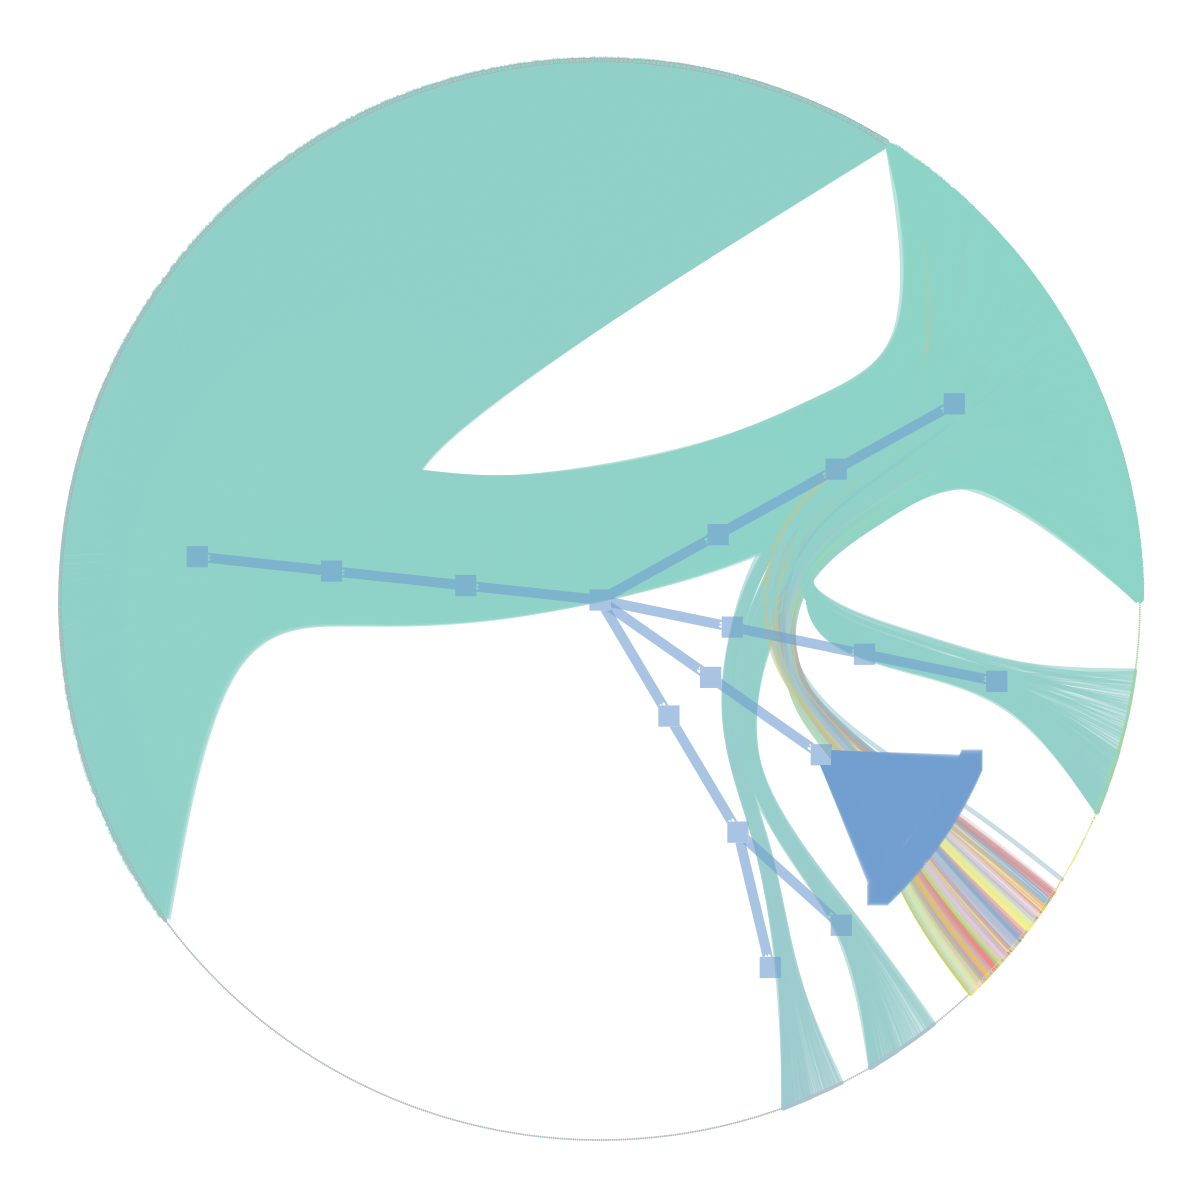

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb104243e80, at 0x7fb0ebb0f220>,
 <Graph object, directed, with 1668 vertices and 1667 edges, at 0x7fb0ec048d90>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb0ec048d90, at 0x7fb0ebabbcd0>)

In [18]:
gt.draw_hierarchy(model.state,
                  subsample_edges=1500,
                  vertex_color=model.g.vp["kind"],
                 hedge_pen_width=5,
                  hvertex_size=15,
                 edge_pen_width=model.g.ep["count"])